## Assignment: $k$ Means Clustering

### `! git clone https://github.com/ds3001f25/clustering_assignment.git`

### **Do two questions in total: "Q1+Q2" or "Q1+Q3"**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [6]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

Q1.2

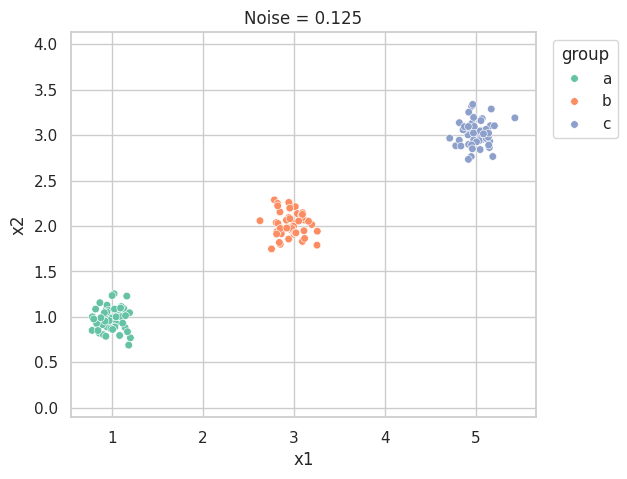

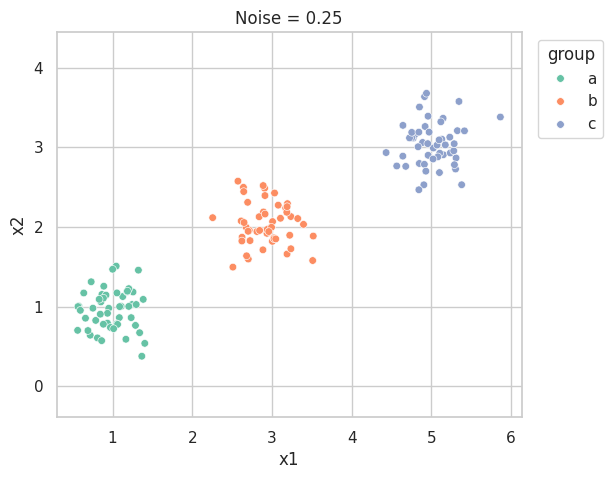

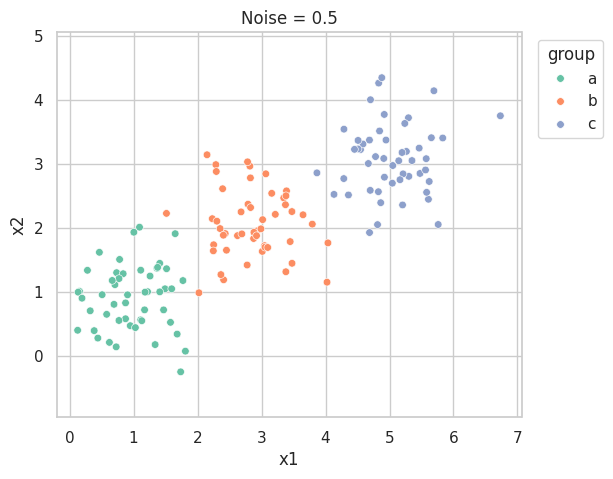

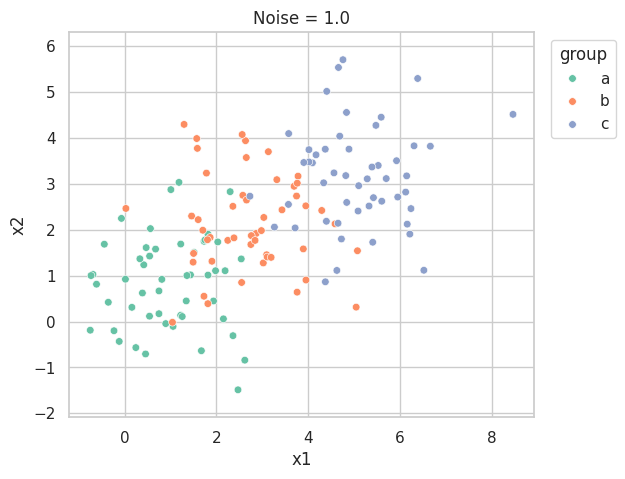

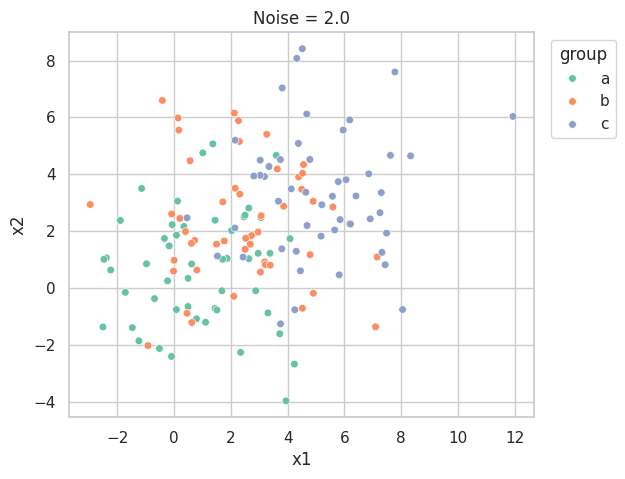

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", rc={"figure.figsize": (6,5)})

# Use common axes so the pictures are comparable
_all = pd.concat([df0_125, df0_25, df0_5, df1_0, df2_0], ignore_index=True)
xmin, xmax = _all['x1'].min()-1, _all['x1'].max()+1
ymin, ymax = _all['x2'].min()-1, _all['x2'].max()+1

ax = sns.scatterplot(data=df0_125, x='x1', y='x2', hue='group', s=30, palette='Set2')
ax.set_title('Noise = 0.125'); plt.xlim(xmin,xmax); plt.ylim(ymin,ymax)
plt.legend(title='group', bbox_to_anchor=(1.02,1)); plt.axis('equal'); plt.show()

ax = sns.scatterplot(data=df0_25, x='x1', y='x2', hue='group', s=30, palette='Set2')
ax.set_title('Noise = 0.25'); plt.xlim(xmin,xmax); plt.ylim(ymin,ymax)
plt.legend(title='group', bbox_to_anchor=(1.02,1)); plt.axis('equal'); plt.show()

ax = sns.scatterplot(data=df0_5, x='x1', y='x2', hue='group', s=30, palette='Set2')
ax.set_title('Noise = 0.5'); plt.xlim(xmin,xmax); plt.ylim(ymin,ymax)
plt.legend(title='group', bbox_to_anchor=(1.02,1)); plt.axis('equal'); plt.show()

ax = sns.scatterplot(data=df1_0, x='x1', y='x2', hue='group', s=30, palette='Set2')
ax.set_title('Noise = 1.0'); plt.xlim(xmin,xmax); plt.ylim(ymin,ymax)
plt.legend(title='group', bbox_to_anchor=(1.02,1)); plt.axis('equal'); plt.show()

ax = sns.scatterplot(data=df2_0, x='x1', y='x2', hue='group', s=30, palette='Set2')
ax.set_title('Noise = 2.0'); plt.xlim(xmin,xmax); plt.ylim(ymin,ymax)
plt.legend(title='group', bbox_to_anchor=(1.02,1)); plt.axis('equal'); plt.show()

As noise goes up, the visual distinctness of the clusters diminishes. At lower noise values, the clusters are distinct and completely separate. At higher noise values, the clusters overlap and integrate with one another. The clusters move closer and closer together and ultimately merge.

Q1.3

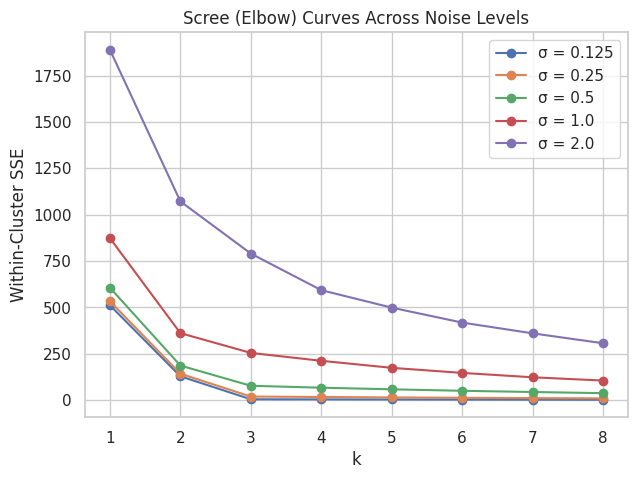

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ks = list(range(1, 9))

# Inertia for each dataset
inertia_0125 = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df0_125[['x1','x2']])
    inertia_0125.append(km.inertia_)

inertia_025 = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df0_25[['x1','x2']])
    inertia_025.append(km.inertia_)

inertia_05 = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df0_5[['x1','x2']])
    inertia_05.append(km.inertia_)

inertia_10 = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df1_0[['x1','x2']])
    inertia_10.append(km.inertia_)

inertia_20 = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df2_0[['x1','x2']])
    inertia_20.append(km.inertia_)

# Plot for comparison
plt.figure(figsize=(7,5))
plt.plot(ks, inertia_0125, marker='o', label='σ = 0.125')
plt.plot(ks, inertia_025,  marker='o', label='σ = 0.25')
plt.plot(ks, inertia_05,   marker='o', label='σ = 0.5')
plt.plot(ks, inertia_10,   marker='o', label='σ = 1.0')
plt.plot(ks, inertia_20,   marker='o', label='σ = 2.0')
plt.xlabel('k'); plt.ylabel('Within-Cluster SSE')
plt.title('Scree (Elbow) Curves Across Noise Levels')
plt.legend()
plt.show()

The level of noise affects the scree plot in various ways. At noise level 0.125 and 0.25 there is a clear elbow at k = 3, thus selecting a k-value for these levels is relatively straightforward. At a moderate noise level of 0.5/1.0, the elbow is much weaker and the curve is smoother/less dramartic, we could select k = 3 but with less confidence than the lower noise levels. At a high noise value of 2.0 the curve is much flatter and decreases gradually for k. Thus, it is difficult to chose a k-value confidently.

Q1.4

The intuition of the elbow is to plot graphs within-cluster SSE vs. the number of clusters (k). Adding additional clusters reduces SSE but the rate of improvement changes. For example, when k is below the true number of clusters, SSE drops significantly from one k value to the next. With each increase the k value, there is a decrease in SSE but also a decrease in the change in SSE.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

Q2.1

In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid", rc={"figure.figsize": (7,5)})

# Load
url_elec = "https://raw.githubusercontent.com/KendallFreese/clustering_assignment/main/data/2022%20election%20cycle%20fundraising.csv"
elec = pd.read_csv(url_elec)


#elec_path = "/mnt/data/2022 election cycle fundraising.csv"
#elec = pd.read_csv(elec_path)
elec.columns = elec.columns.str.strip()

# Keep these columns (rename your name column if needed)
cols = ['Candidate', 'Raised', 'Spent', 'Cash on Hand', 'Debts']
elec = elec[cols].copy()

# Clean $ and , then to float (write explicitly; no loops)
elec['Raised'] = pd.to_numeric(elec['Raised'].astype(str).str.replace(r'[\$,]', '', regex=True), errors='coerce')
elec['Spent'] = pd.to_numeric(elec['Spent'].astype(str).str.replace(r'[\$,]', '', regex=True), errors='coerce')
elec['Cash on Hand'] = pd.to_numeric(elec['Cash on Hand'].astype(str).str.replace(r'[\$,]', '', regex=True), errors='coerce')
elec['Debts'] = pd.to_numeric(elec['Debts'].astype(str).str.replace(r'[\$,]', '', regex=True), errors='coerce')

elec = elec.dropna(subset=['Raised','Spent','Cash on Hand','Debts'])
elec.head()



KeyError: "['Candidate'] not in index"

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid", rc={"figure.figsize": (7,5)})

# Change this if your file name/location differs:
url_elec = "https://raw.githubusercontent.com/KendallFreese/clustering_assignment/main/data/2022%20election%20cycle%20fundraising.csv"
elec = pd.read_csv(url_elec)
elec.columns = elec.columns.str.strip()

# If your dataset uses another name field, set it here (e.g., "Committee Name")
NAME_COL = "Candidate"

# Keep & lightly clean the four money columns
cols_use = [NAME_COL, "Raised", "Spent", "Cash on Hand", "Debts"]
elec = elec[cols_use].copy()

elec["Raised"]        = pd.to_numeric(elec["Raised"].astype(str).str.replace(r"[\$,]", "", regex=True), errors="coerce")
elec["Spent"]         = pd.to_numeric(elec["Spent"].astype(str).str.replace(r"[\$,]", "", regex=True), errors="coerce")
elec["Cash on Hand"]  = pd.to_numeric(elec["Cash on Hand"].astype(str).str.replace(r"[\$,]", "", regex=True), errors="coerce")
elec["Debts"]         = pd.to_numeric(elec["Debts"].astype(str).str.replace(r"[\$,]", "", regex=True), errors="coerce")

elec.head()

KeyError: "['Candidate'] not in index"

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the spending?

Q3.1

In [14]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid", rc={"figure.figsize": (7,5)})

# Load data
sipri_url = "https://raw.githubusercontent.com/KendallFreese/clustering_assignment/main/data/SIPRI%20Military%20Expenditure%20Database.csv"
sipri = pd.read_csv(sipri_url)
sipri.columns = sipri.columns.str.strip()

# Only 2020
if "Year" not in sipri.columns and "year" in sipri.columns:
    sipri = sipri.rename(columns={"year":"Year"})
df2020 = sipri[sipri["Year"] == 2020].copy()

# Coerce the four variables to numeric and drop rows with missing values
df2020["Spending (2020 USD)"] = pd.to_numeric(df2020["Spending (2020 USD)"], errors="coerce")
df2020["Spending per Capita"] = pd.to_numeric(df2020["Spending per Capita"], errors="coerce")
df2020["Percent of Government Spending"] = pd.to_numeric(df2020["Percent of Government Spending"], errors="coerce")
df2020["Percent of GDP"] = pd.to_numeric(df2020["Percent of GDP"], errors="coerce")

df2020 = df2020.dropna(subset=["Spending (2020 USD)",
    "Spending per Capita",
    "Percent of Government Spending",
    "Percent of GDP"
])

print("Rows after cleaning:", len(df2020))
df2020[["Country","Spending (2020 USD)","Spending per Capita",
      "Percent of Government Spending","Percent of GDP"]].head(3)


Rows after cleaning: 148


,Country,Spending (2020 USD),Spending per Capita,Percent of Government Spending,Percent of GDP
32,Afghanistan,279.576955,7.181899,0.049728,0.013589
66,Albania,187.433234,65.126211,0.037952,0.012583
100,Algeria,9708.277440,221.392384,0.173924,0.066600


Is any further cleaning of the variables needed?

standardize column names to the four requested fields, coerce to numeric, and drop missing rows so k-means runs without errors.

Q3.2

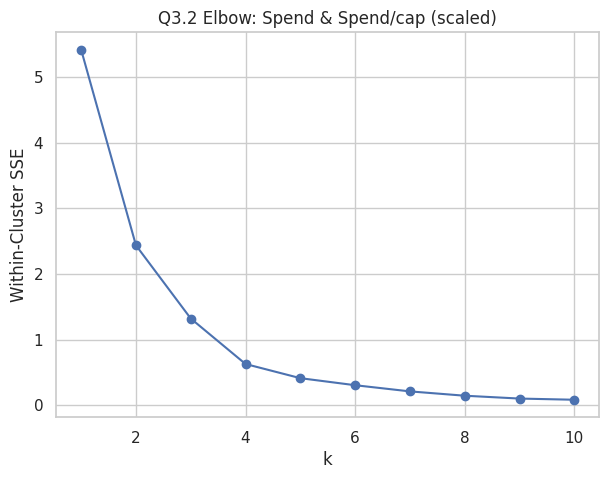

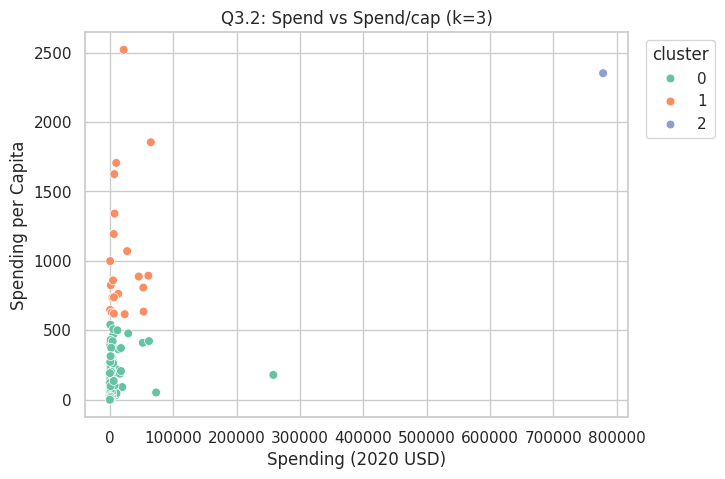

Spending (2020 USD)                                             \
                      count       mean       std        min        25%   
cluster                                                                  
0                     126.0    5943.35  24858.96       8.62     162.76   
1                      21.0   19975.99  21749.74     405.79    4980.43   
2                       1.0  778397.20       NaN  778397.20  778397.20   

                                         Spending per Capita                   \
               50%        75%        max               count     mean     std   
cluster                                                                         
0           580.76    3225.33  257973.43               126.0   122.03  140.04   
1          7269.88   27300.89   64558.40                21.0  1046.43  501.63   
2        778397.20  778397.20  778397.20                 1.0  2351.63     NaN   

                                                      
             min      25%      50%      75%      max  
cluster                                               
0           0.58    18.51    58.81   188.25   541.15  
1         616.85   737.69   859.88  1193.60  2520.40  
2        2351.63  2351.63  2351.63  2351.63  2351.63

In [16]:
scaler = MinMaxScaler()
X_ss = scaler.fit_transform(df2020[["Spending (2020 USD)", "Spending per Capita"]])

# Scree elbow curve
ks = list(range(1, 11))
inertia_ss = []
for k in ks:
    inertia_ss.append(KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_ss).inertia_)
plt.plot(ks, inertia_ss, marker="o")
plt.xlabel("k"); plt.ylabel("Within-Cluster SSE"); plt.title("Q3.2 Elbow: Spend & Spend/cap (scaled)")
plt.show()

# K from elbow
k_ss = 3
labels_ss = KMeans(n_clusters=k_ss, random_state=42, n_init=10).fit_predict(X_ss)

# Scatter of spending v. spending/capita, color by cluster
plot_ss = df2020[["Country","Spending (2020 USD)","Spending per Capita"]].copy()
plot_ss["cluster"] = labels_ss
ax = sns.scatterplot(data=plot_ss, x="Spending (2020 USD)", y="Spending per Capita",
                     hue="cluster", palette="Set2", s=40)
ax.set_title(f"Q3.2: Spend vs Spend/cap (k={k_ss})")
plt.legend(title="cluster", bbox_to_anchor=(1.02,1), loc="upper left"); plt.show()

# Describe by cluster
plot_ss.groupby("cluster")[["Spending (2020 USD)","Spending per Capita"]].describe().round(2)

What do you see? Where is the United States? Do you notice any patterns in the cluster membership?


I see that the elbow curve has a clear bend at k=3. There are 3 distinct clusers (2 and 1 outlier) where cluster 0 is has low per-capita spend, cluster 1 has high per-capita spend, and cluster 2 which is an extreme outlier with an extremely high per-capita spend.

The United States is the lone outlier in cluster 2 with very high spending and very high spending per capita.



